In [1]:
import pandas as pd
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline

df_cr = pd.read_csv('data/SR-EELS-Profil_SM125_-33%/Cr_raw.csv')
df_fe = pd.read_csv('data/SR-EELS-Profil_SM125_-33%/Fe_raw.csv')

disp_lat = 0.1861361

xs = [x * disp_lat for x in range(len(df_cr))]
df_cr['X0'] = xs
df_fe['X0'] = xs

df_cr.Y0 = df_cr.Y0 / df_cr.Y0.max()
df_fe.Y0 = df_fe.Y0 / df_fe.Y0.max()

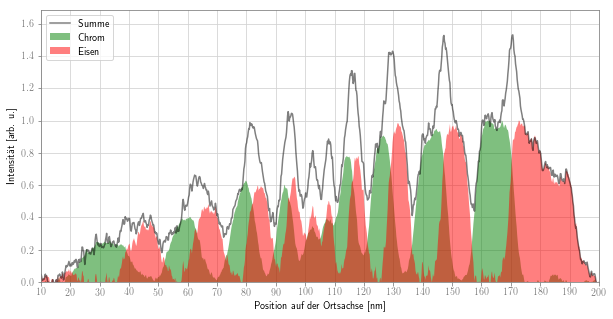

In [2]:
plt.figure(figsize=(10, 5))
plt.fill_between(df_cr.X0, df_cr.Y0, label='Chrom', color='g', lw=0, alpha=0.5)
plt.fill_between(df_fe.X0, df_fe.Y0, label='Eisen', color='r', lw=0, alpha=0.5)
plt.plot(df_cr.X0, df_cr.Y0 + df_fe.Y0, label='Summe', c='k',alpha=0.5)
plt.xlim(15, 200)
plt.xticks(range(10, 201, 10))
plt.ylim(0, 1.1 * np.max(df_cr.Y0 + df_fe.Y0))
plt.xlabel('Position auf der Ortsachse [nm]')
plt.ylabel('Intensität [arb. u.]')
plt.legend(loc=2)
plt.savefig('Bilder/SR-EELS_FeCr_SM125_-33_Linescan')
plt.show()

In [3]:
norm_cs = df_cr.Y0 / df_cr.Y0.max()
norm_fe = df_fe.Y0 / df_fe.Y0.max()
ys = lambda shift: norm_cs + norm_fe.shift(shift)
# Bei einem Produkt stimmt der automatisch bestimmte Wert besser mit dem manuell bestimmten Wert überein.
prods = lambda shift: norm_cs * norm_fe.shift(shift)

shift_opt = 0
stdv_opt = prods(0).std()
for offset in range(1, 31):
    stdv = prods(offset).std()
    print(offset, stdv)
    if stdv < stdv_opt:
        shift_opt = offset
        stdv_opt = stdv
shift_opt, shift_opt * disp_lat

1 0.105197921017
2 0.0991386717842
3 0.0932497276811
4 0.0875897270303
5 0.0822311741329
6 0.0772834781833
7 0.0728610710674
8 0.0690545176407
9 0.065959941199
10 0.0636616097318
11 0.0622475340842
12 0.0617863210775
13 0.0622684190175
14 0.0636207673048
15 0.0657727615616
16 0.0686288227209
17 0.0720812904726
18 0.0760335741952
19 0.0803747828178
20 0.0849999118174
21 0.0898395545992
22 0.0948269667199
23 0.0999198163731
24 0.105068805905
25 0.110227022602
26 0.115367696917
27 0.120479656105
28 0.12554268569
29 0.130528341322
30 0.135427499803


(12, 2.2336332)

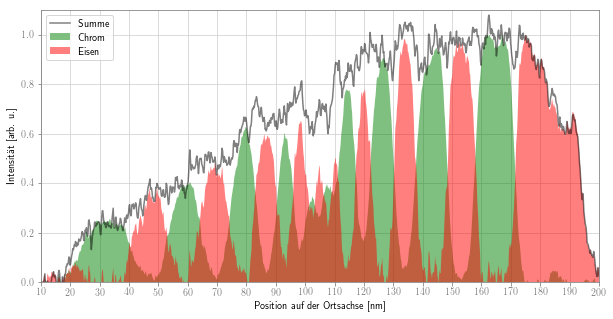

In [4]:
plt.figure(figsize=(10, 5))
plt.fill_between(df_cr.X0, df_cr.Y0, label='Chrom', color='g', lw=0, alpha=0.5)
plt.fill_between(df_fe.X0 + shift_opt * disp_lat, df_fe.Y0, label='Eisen', color='r', lw=0, alpha=0.5)
ys_raw = lambda shift: df_cr.Y0 + df_fe.Y0.shift(shift)
plt.plot(df_cr.X0, ys_raw(shift_opt), label='Summe', c='k',alpha=0.5)
plt.xlim(15, 200)
plt.xticks(range(10, 201, 10))
plt.ylim(0, 1.1 * df_cr.Y0.max())
plt.xlabel('Position auf der Ortsachse [nm]')
plt.ylabel('Intensität [arb. u.]')
plt.legend(loc='best')
plt.savefig('Bilder/SR-EELS_FeCr_SM125_-33_Linescan2')
plt.show()

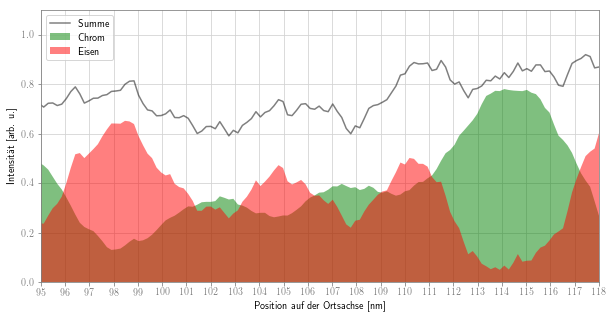

In [5]:
plt.figure(figsize=(10, 5))
plt.fill_between(df_cr.X0, df_cr.Y0, label='Chrom', color='g', lw=0, alpha=0.5)
plt.fill_between(df_fe.X0 + shift_opt * disp_lat, df_fe.Y0, label='Eisen', color='r', lw=0, alpha=0.5)
ys_raw = lambda shift: df_cr.Y0 + df_fe.Y0.shift(shift)
plt.plot(df_cr.X0, ys_raw(shift_opt), label='Summe', c='k',alpha=0.5)
plt.xlim(95, 118)
plt.xticks(range(95, 119))
plt.ylim(0, 1.1 * df_cr.Y0.max())
plt.xlabel('Position auf der Ortsachse [nm]')
plt.ylabel('Intensität [arb. u.]')
plt.legend(loc='best')
plt.savefig('Bilder/SR-EELS_FeCr_SM125_-33_Linescan2_Ausschnitt')
plt.show()